In [24]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.electronic_structure import plotter

In [25]:
with MPRester("Enpk9zc3KTfZxN4DTgTx") as m:
    band = m.get_bandstructure_by_material_id("mp-30847")

La bande interdite est indirecte, et d'une largeur de  0.7910000000000004  eV. Elle est représentée en rouge dans le graphe ci-dessous.


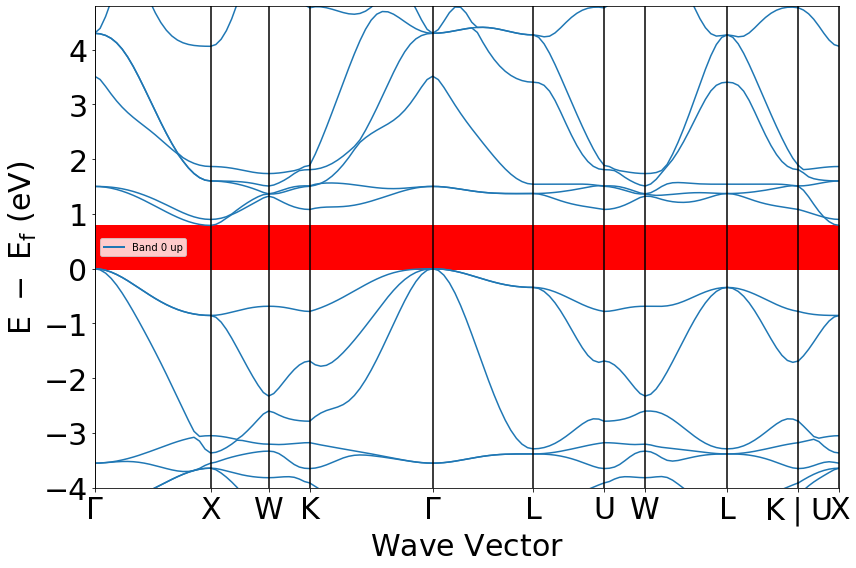

In [26]:
# Bande interdite

bande = band.get_band_gap()

#print(bande)
#print(str(bande.get('direct')))
#print(bande['energy'])

graphe = plotter.BSPlotter(band)
distance = bs_plot_data.get('ticks').get('distance')
get_band_gap = band.get_band_gap()
bs_plot_data = graphe.bs_plot_data()

graphe.get_plot()
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, get_band_gap.get('energy'), color = "red")
vbm_coord = bs_plot_data.get('vbm')
cbm_coord = bs_plot_data.get('cbm')

print("La bande interdite est indirecte, et d'une largeur de ", bande['energy'], " eV. Elle est représentée en rouge dans le graphe ci-dessous.")

In [27]:
# DISPERSION

# Dernière bande de valance

def slope(a,b) : 
    pente = abs(b[-1]-b[0])/(a[-1]-a[0])
    return np.array([pente,a[0],b[0],a[-1]-a[0],b[-1]-b[0]])

#print(band.get_vbm()['band_index'])
d = len(distances)
slopesV = np.zeros((len(distances), 5))

i_maxV = 0
i_minV = 0
slope_minV = 0
slope_maxV = 0


for i in range(len(distances)) : 
    slopesV[i] = slope(distances[i],energy["1"][i][16]) 
    if i == 0: 
        slope_minV = slope(distances[i],energy["1"][i][16])[0] 
        slope_maxV = slope(distances[i],energy["1"][i][16])[0] 
    else :
        if (slope_minV > slopesV[i][0]) :
            slope_minV = slopesV[i][0] 
            i_minV = i
        if slope_maxV < slopesV[i][0]  :
            slope_maxV = slopesV[i][0] 
            i_maxV = i
            
slopesV = slopesV.T

In [28]:
# DISPERSION

# Première bande de conduction


#print(band.get_cbm()['band_index'])
d = len(distances)
slopesC = np.zeros((len(distances), 5))

i_maxC = 0
i_minC = 0
slope_minC = 0
slope_maxC = 0


for i in range(len(distances)) : 
    slopesC[i] = slope(distances[i],energy["1"][i][17]) 
    if i == 0: 
        slope_minC = slope(distances[i],energy["1"][i][17])[0] 
        slope_maxC = slope(distances[i],energy["1"][i][17])[0] 
    else :
        if (slope_minC > slopesC[i][0]) :
            slope_minC = slopesC[i][0] 
            i_minC = i
        if slope_maxC < slopesC[i][0]  :
            slope_maxC = slopesC[i][0] 
            i_maxC = i
            
slopesC = slopesC.T

En rouge sont les endroits où la dispertion est la plus grande, tandis qu'en vert, sont les endroits où la dispertion est la plus petite.


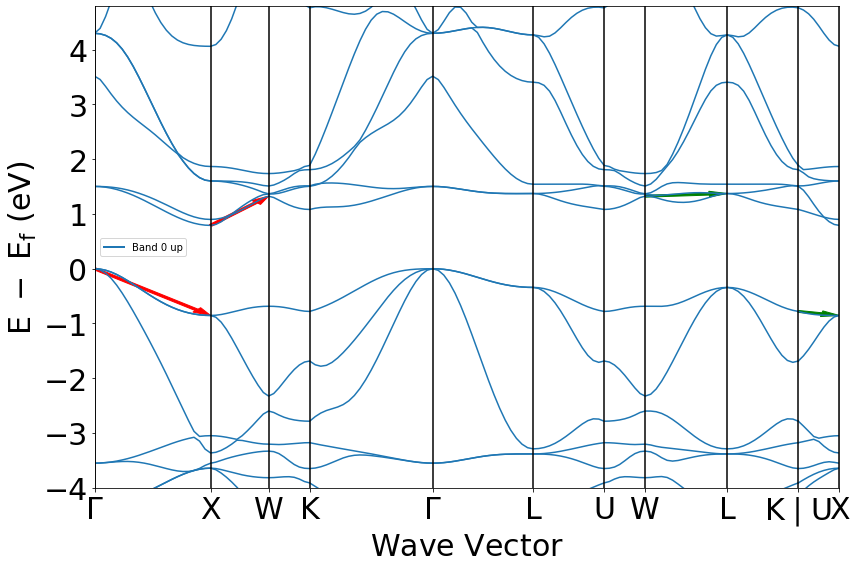

In [29]:
# DISPERTION 

# Graphique

graphe.get_plot()

plt.arrow(slopesV[1][i_maxV], slopesV[2][i_maxV], slopesV[3][i_maxV], slopesV[4][i_maxV], color='red', width=0.035, length_includes_head=True)
plt.arrow(slopesV[1][i_minV], slopesV[2][i_minV], slopesV[3][i_minV], slopesV[4][i_minV], color='green', width=0.035, length_includes_head=True)

plt.arrow(slopesC[1][i_maxC], slopesC[2][i_maxC], slopesC[3][i_maxC], slopesC[4][i_maxC], color='red', width=0.035, length_includes_head=True)
plt.arrow(slopesC[1][i_minC], slopesC[2][i_minC], slopesC[3][i_minC], slopesC[4][i_minC], color='green', width=0.035, length_includes_head=True)

print("En rouge sont les endroits où la dispertion est la plus grande, tandis qu'en vert, sont les endroits où la dispertion est la plus petite.")


In [32]:
# MASSE EFFECTIVE 

# Sommet de la dernière bande de valence

K_v = np.zeros(3)
E_v = np.zeros(3)

K_v[0] = distances [3] [-3]
K_v[1] = vbm_coord[1][0]
K_v[2] = distances [4] [2]

E_v[0] = energy.get('1')[3][16][-3]
E_v[1] = vbm_coord[1][1]
E_v[2] = energy.get('1')[4][16][2]

fonction_VBM = np.polyfit(K_v, E_v, 2) 
intervalle_VBM = np.linspace(distances[3][0],distances[4][-1],500)

h = (6.62607*10**(-34))/(2*np.pi*1.6021766*10**(-19)) 
mstar_v = h**2/(2*fonction_VBM[0])

print("La masse effective pour la dernière bande de valence vaut : ",mstar_v, "kg.")


La masse effective pour la dernière bande de valence vaut :  -2.7226824604372156e-31 kg.


In [33]:
# MASSE EFFECTIVE

# Base de la première bande de valence

K_c = np.zeros(3)
E_c = np.zeros(3)

K_c[0] = distances [3] [-3]
K_c[1] = vbm_coord[1][0]
K_c[2] = distances [4] [2]

E_c[0] = energy.get('1')[3][17][-3]
E_c[1] = vbm_coord[1][1]
E_c[2] = energy.get('1')[4][17][2]

fonction_CBM = np.polyfit(K_c, E_c, 2) 
intervalle_CBM = np.linspace(distances[3][0],distances[4][-1],500)

h = (6.62607*10**(-34))/(2*np.pi*1.6021766*10**(-19)) 
mstar_c = h**2/(2*fonction_CBM[0])

print("La masse effective pour la première bande de conduction vaut : ",mstar_c, "kg.")

La masse effective pour la première bande de conduction vaut :  1.3694565739004139e-33 kg.
